# 리그 오브 레전드 데이터 셋
    - 각 파일의 컬럼은 아래와 같습니다.
    gameId: 게임 판의 고유 ID
    blueWins: 블루팀의 승리 여부 (0: 패배, 1: 승리)
    xxxWardsPlaced: xxx팀에서 설치한 와드의 수 
    xxxWardsDestroyed: xxx팀에서 파괴한 와드의 수
    xxxFirstBlood: xxx팀의 첫번째 킬 달성 여부
    xxxKills: xxx팀의 킬 수
    xxxDeaths: xxx팀의 죽음 수
    xxxAssists: xxx팀의 어시스트 수
    xxxEliteMonsters: xxx팀이 죽인 엘리트 몬스터 수
    xxxDragons: xxx팀이 죽인 용의 수
    xxxHeralds: xxx팀이 죽인 전령의 수
    xxxTowersDestroyed: xxx팀이 파괴한 탑의 수
    xxxTotalGold: xxx팀의 전체 획득 골드
    xxxAvgLevel: xxx팀의 평균 레벨
    xxxTotalExperience: xxx팀의 총 경험치 획득량
    xxxTotalMinionsKilled: xxx팀의 총 미니언 킬 수
    xxxTotalJungleMinionsKilled: xxx팀의 총 정글 미니언 킬 수
    xxxGoldDiff: xxx팀과 다른 팀 간의 골드 획득량 차이
    xxxExperienceDiff: xxx팀과 다른 팀과의 경험치 획득량 차이
    xxxCSPerMin: xxx팀의 분당 CS 스코어
    xxxGoldPerMin: xxx팀의 분당 골드 획득량

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./data/high_diamond_ranked_10min.csv")
df.shape

(9879, 40)

In [5]:
pd.options.display.max_columns = 40

In [6]:
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [9]:
round(df.describe(), 3)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000,9879.000,9879.000,9879.000,9879.000,9879.000,9879.000,9879.000,9879.000,9879.000,9879.000,9879.000,9879.000,9879.000,9879.000,9879.000,9879.000,9879.00,9879.000,9879.000,9879.000,9879.000,9879.000,9879.000,9879.000,9879.000,9879.000,9879.000,9879.000,9879.000,9879.000,9879.000,9879.000,9879.000,9879.000,9879.000,9879.00,9879.000,9879.000
mean,4.500084e+09,0.499,22.288,2.825,0.505,6.184,6.138,6.645,0.550,0.362,0.188,0.051,16503.456,6.916,17928.110,216.700,50.510,14.414,-33.62,21.670,1650.346,22.368,2.723,0.495,6.138,6.184,6.662,0.573,0.413,0.160,0.043,16489.041,6.925,17961.730,217.349,51.313,-14.414,33.62,21.735,1648.904
std,2.757328e+07,0.500,18.019,2.175,0.500,3.011,2.934,4.065,0.626,0.481,0.391,0.244,1535.447,0.305,1200.524,21.858,9.898,2453.349,1920.37,2.186,153.545,18.457,2.138,0.500,2.934,3.011,4.061,0.626,0.492,0.367,0.217,1490.888,0.305,1198.584,21.912,10.028,2453.349,1920.37,2.191,149.089
min,4.295358e+09,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10730.000,4.600,10098.000,90.000,0.000,-10830.000,-9333.00,9.000,1073.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,11212.000,4.800,10465.000,107.000,4.000,-11467.000,-8348.00,10.700,1121.200
25%,4.483301e+09,0.000,14.000,1.000,0.000,4.000,4.000,4.000,0.000,0.000,0.000,0.000,15415.500,6.800,17168.000,202.000,44.000,-1585.500,-1290.50,20.200,1541.550,14.000,1.000,0.000,4.000,4.000,4.000,0.000,0.000,0.000,0.000,15427.500,6.800,17209.500,203.000,44.000,-1596.000,-1212.00,20.300,1542.750
50%,4.510920e+09,0.000,16.000,3.000,1.000,6.000,6.000,6.000,0.000,0.000,0.000,0.000,16398.000,7.000,17951.000,218.000,50.000,14.000,-28.00,21.800,1639.800,16.000,2.000,0.000,6.000,6.000,6.000,0.000,0.000,0.000,0.000,16378.000,7.000,17974.000,218.000,51.000,-14.000,28.00,21.800,1637.800
75%,4.521733e+09,1.000,20.000,4.000,1.000,8.000,8.000,9.000,1.000,1.000,0.000,0.000,17459.000,7.200,18724.000,232.000,56.000,1596.000,1212.00,23.200,1745.900,20.000,4.000,1.000,8.000,8.000,9.000,1.000,1.000,0.000,0.000,17418.500,7.200,18764.500,233.000,57.000,1585.500,1290.50,23.300,1741.850
max,4.527991e+09,1.000,250.000,27.000,1.000,22.000,22.000,29.000,2.000,1.000,1.000,4.000,23701.000,8.000,22224.000,283.000,92.000,11467.000,8348.00,28.300,2370.100,276.000,24.000,1.000,22.000,22.000,28.000,2.000,1.000,1.000,2.000,22732.000,8.200,22269.000,289.000,92.000,10830.000,9333.00,28.900,2273.200


<Axes: >

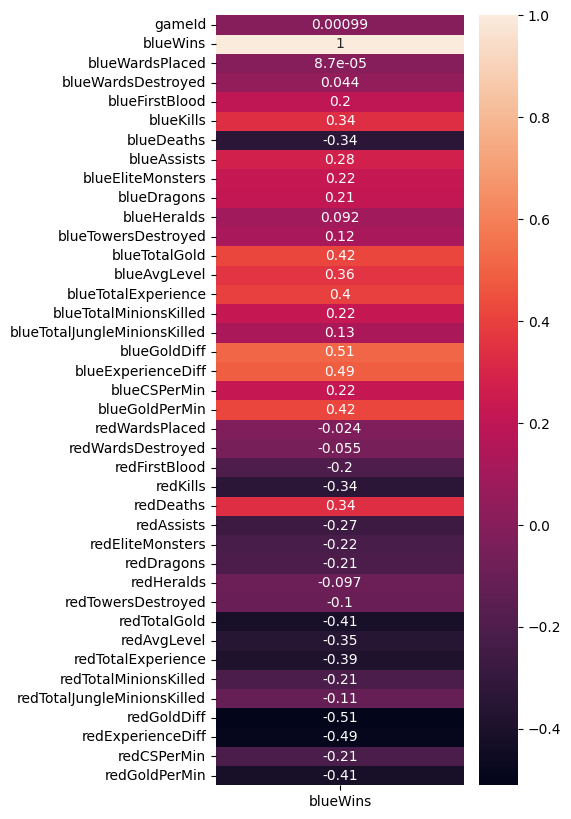

In [10]:
# 상관계수 확인
fig = plt.figure(figsize=(4, 10))
sns.heatmap(df.corr()[["blueWins"]], annot=True)

In [35]:
df.corr()[["blueWins", "blueExperienceDiff", "blueGoldDiff"]]

,blueWins,blueExperienceDiff,blueGoldDiff
gameId,0.000985,-0.012315,-0.014670
blueWins,1.000000,0.489558,0.511119
blueWardsPlaced,0.000087,0.027943,0.015800
blueWardsDestroyed,0.044247,0.077946,0.078585
blueFirstBlood,0.201769,0.240665,0.378511
blueKills,0.337358,0.583730,0.654148
blueDeaths,-0.339297,-0.577613,-0.640000
blueAssists,0.276685,0.437002,0.549761
blueEliteMonsters,0.221944,0.263991,0.281464
blueDragons,0.213768,0.211496,0.233875


In [13]:
# 각 컬럼과 승리 여부의 관계 시각화
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

<Axes: xlabel='blueGoldDiff', ylabel='Count'>

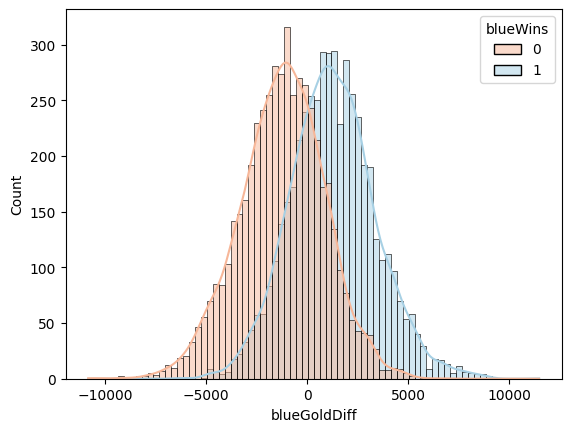

In [32]:
sns.histplot(x="blueGoldDiff", data=df, hue="blueWins", palette="RdBu", kde=True)

In [21]:
df["blueWins"].value_counts()

blueWins
0    4949
1    4930
Name: count, dtype: int64

<Axes: xlabel='blueTotalExperience', ylabel='Count'>

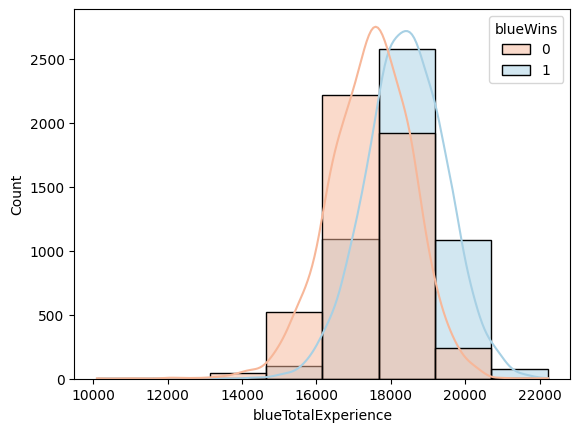

In [23]:
sns.histplot(x="blueTotalExperience", data=df, hue="blueWins", palette="RdBu", kde=True, bins=8)

<Axes: xlabel='blueKills', ylabel='Count'>

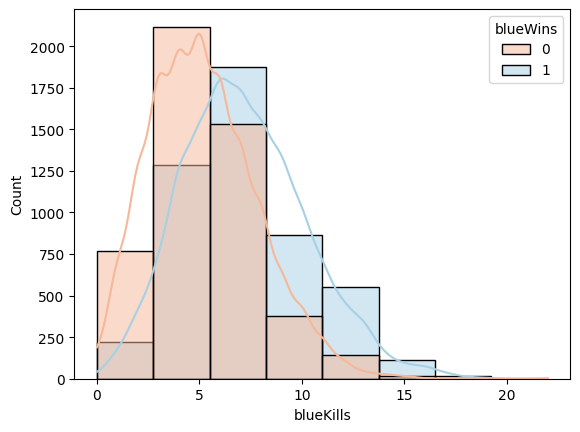

In [31]:
sns.histplot(
    x="blueKills", data=df, hue="blueWins", palette="RdBu", kde=True, bins=8
)

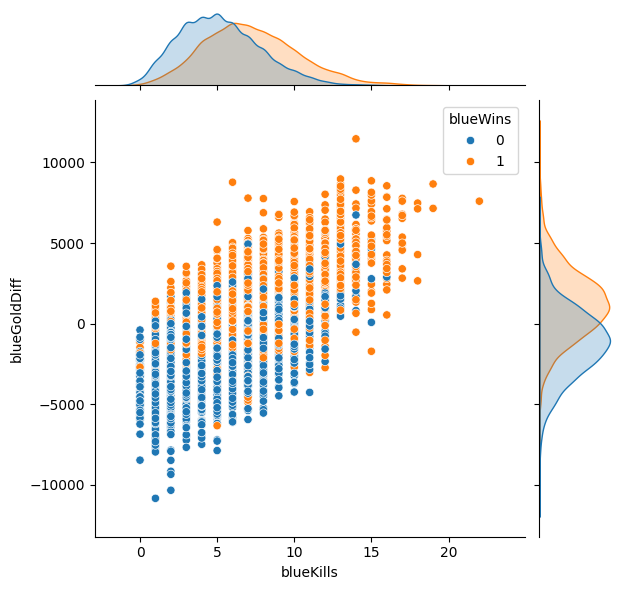

In [29]:
sns.jointplot(x="blueKills", y="blueGoldDiff", data=df, hue="blueWins")

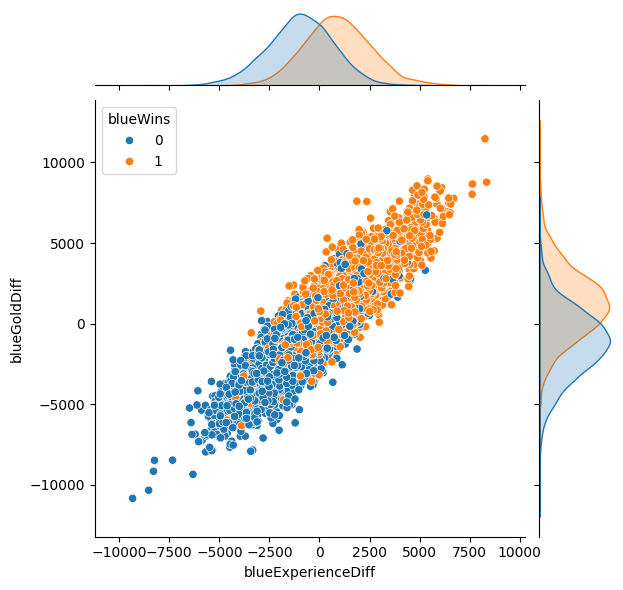

In [33]:
sns.jointplot(x="blueExperienceDiff", y="blueGoldDiff", data=df, hue="blueWins")

<Axes: xlabel='blueDragons', ylabel='count'>

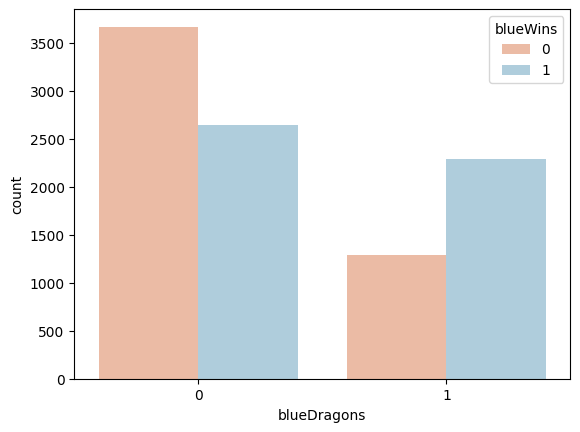

In [36]:
sns.countplot(x="blueDragons", data=df, hue="blueWins", palette="RdBu")

<Axes: xlabel='redDragons', ylabel='count'>

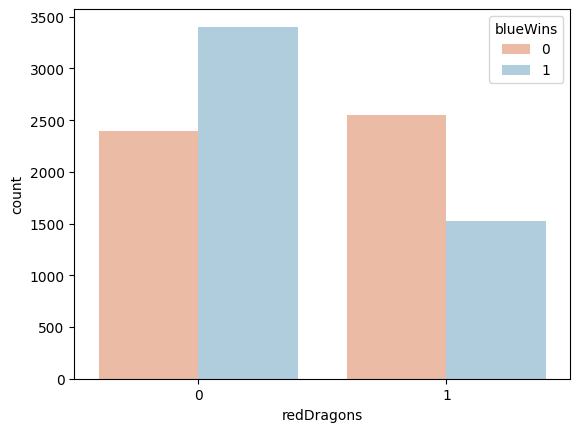

In [38]:
sns.countplot(x="redDragons", data=df, hue="blueWins", palette="RdBu")

In [40]:
# 모델학습을 위한 전처리
from sklearn.preprocessing import StandardScaler
sc_saler = StandardScaler()

In [41]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [42]:
df.drop(
    [
        "gameId",
        "redFirstBlood",
        "redKills",
        "redDeaths",
        "redTotalExperience",
        "redGoldDiff",
        "redExperienceDiff"
    ],
    axis=True, inplace=True
)

In [45]:
df.head(3)

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalMinionsKilled,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,8,0,0,0,0,16567,6.8,197,55,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,2,2,1,1,1,17620,6.8,240,52,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,14,0,0,0,0,17285,6.8,203,28,20.3,1728.5


In [46]:
X_num = df[
    [
        "blueWardsPlaced",
        "blueWardsDestroyed",
        "blueKills",
        "blueDeaths",
        "blueAssists",
        "blueEliteMonsters",
        "blueTowersDestroyed",
        "blueTotalGold",
        "blueAvgLevel",
        "blueTotalExperience",
        "blueTotalMinionsKilled",
        "blueTotalJungleMinionsKilled",
        "blueGoldDiff",
        "blueExperienceDiff",
        "blueCSPerMin",
        "blueGoldPerMin",
        "redWardsPlaced",
        "redWardsDestroyed",
        "redAssists",
        "redEliteMonsters",
        "redTowersDestroyed",
        "redAvgLevel",
        "redTotalMinionsKilled",
        "redTotalJungleMinionsKilled",
        "redCSPerMin",
        "redGoldPerMin",
    ]
]
X_cat = df[["blueFirstBlood", "blueDragons", "blueHeralds", "redDragons", "redHeralds"]]

In [49]:
X_scaled = sc_saler.fit_transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)
y = df["blueWins"]

In [ ]:
# 공분산성, 다중선형성(다중공선성)


In [50]:
X

,blueWardsPlaced,blueWardsDestroyed,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redAssists,redEliteMonsters,redTowersDestroyed,redAvgLevel,redTotalMinionsKilled,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin,blueFirstBlood,blueDragons,blueHeralds,redDragons,redHeralds
0,0.316996,-0.379275,0.935301,-0.046926,1.071495,-0.879231,-0.210439,0.460179,-1.035635,-0.740639,-0.992782,-1.465951,0.256228,0.013342,-0.992782,0.460179,-0.399207,1.532493,0.329496,-0.914893,-0.198353,-0.410475,-0.928741,0.367685,-0.928741,0.052293,1,0,0,0,0
1,-0.570992,-0.839069,-0.393216,-0.387796,-0.404768,-0.879231,-0.210439,-1.166792,-1.035635,-1.385391,-1.953558,-0.758722,-1.191254,-0.593342,-1.953558,-1.166792,-0.561751,-0.805870,-1.148188,2.277700,4.412301,-0.410475,1.033784,0.068504,1.033784,0.758619,0,0,0,1,1
2,-0.404494,-1.298863,0.271042,1.657424,-0.650812,0.719503,-0.210439,-0.254307,-1.691092,-1.422043,-1.404543,-0.455624,-0.483614,-0.520436,-1.404543,-0.254307,-0.399207,0.129475,1.807181,-0.914893,-0.198353,-0.410475,-0.654900,-2.324944,-0.654900,0.533909,0,1,0,0,0
3,1.149484,-0.839069,-0.725346,-0.387796,-0.404768,0.719503,-0.210439,-0.876959,0.275280,0.021567,-0.718275,0.453671,-0.544350,0.013863,-0.718275,-0.876959,-0.399207,-0.338198,0.822058,-0.914893,-0.198353,0.244627,0.805583,-0.430131,0.805583,-0.007406,0,0,1,0,0
4,2.925460,0.540312,-0.061087,-0.046926,-0.158724,-0.879231,-0.210439,-0.067382,0.275280,0.512211,-0.306513,0.655736,-0.415133,0.137283,-0.306513,-0.067382,-0.290844,-0.338198,0.083215,0.681403,-0.198353,0.244627,0.349182,1.564408,0.349182,0.613731,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,-0.293496,-0.379275,0.271042,-0.728666,-0.404768,0.719503,-0.210439,0.821656,0.930738,0.865408,-0.260762,1.868129,1.020936,1.303263,-0.260762,0.821656,1.280419,0.129475,0.083215,-0.914893,-0.198353,-0.410475,0.531742,-1.726582,0.531742,-0.833801,1,1,0,0,0
9875,1.759976,-1.298863,-0.061087,-0.728666,0.333364,0.719503,-0.210439,-0.172894,0.930738,1.105315,0.745765,-0.253559,0.312888,0.479942,0.745765,-0.172894,-0.561751,8.547582,-0.901908,-0.914893,-0.198353,0.244627,-0.517980,0.467412,-0.517980,-0.692938,0,1,0,0,0
9876,0.039499,-0.839069,-0.061087,0.293944,-0.404768,-0.879231,-0.210439,-0.391082,0.275280,0.086541,-0.306513,-0.556657,-0.990702,-0.959957,-0.306513,-0.391082,-0.453388,-1.273543,1.068338,0.681403,-0.198353,1.554831,1.992226,0.866319,1.992226,1.227490,0,0,0,1,0
9877,-0.459994,0.540312,-1.389604,-1.069536,-0.896856,0.719503,-0.210439,-1.331573,-1.035635,-0.582367,0.334004,-0.253559,-0.347874,-0.547516,0.334004,-1.331573,2.364049,0.597148,-1.394469,-0.914893,-0.198353,0.899729,1.353264,-1.128220,1.353264,-0.798921,1,1,0,0,0


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [95]:
from sklearn.metrics import classification_report
test_pred_lr = model_lr.predict(X_test)
print(classification_report(y_test, test_pred_lr))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1469
           1       0.75      0.74      0.74      1495

    accuracy                           0.74      2964
   macro avg       0.74      0.74      0.74      2964
weighted avg       0.74      0.74      0.74      2964



In [96]:
from xgboost import  XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
test_pred_xgb = model_xgb.predict(X_test)
print(classification_report(y_test, test_pred_xgb))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1469
           1       0.72      0.72      0.72      1495

    accuracy                           0.72      2964
   macro avg       0.72      0.72      0.72      2964
weighted avg       0.72      0.72      0.72      2964



In [64]:
# 학습된 모델 분석 및 퓨처엔지니어링
# len(model_lr.coef_[0])
model_coef = pd.DataFrame(data=model_lr.coef_[0], index=X.columns, columns=["Model_Coefficient"])
model_coef.sort_values(by="Model_Coefficient", ascending=False, inplace=True)
model_coef.head()

,Model_Coefficient
blueGoldDiff,0.443465
blueExperienceDiff,0.421048
blueTotalGold,0.304533
blueGoldPerMin,0.304533
blueDragons,0.169555


<function matplotlib.pyplot.show(close=None, block=None)>

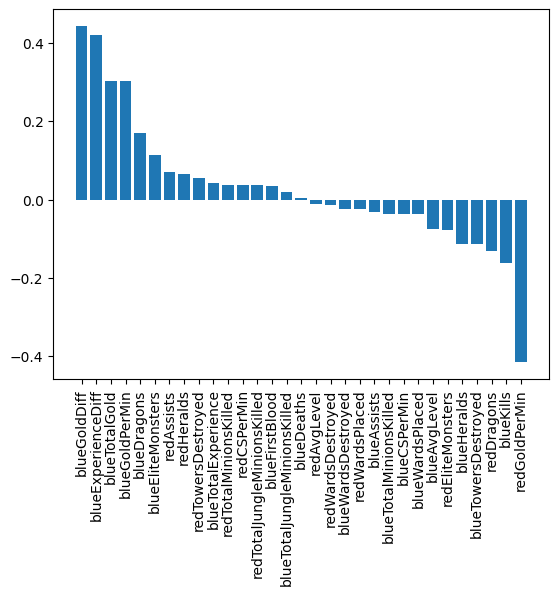

In [65]:
plt.bar(model_coef.index, model_coef["Model_Coefficient"])
plt.xticks(rotation=90)
plt.show

In [69]:
model_coef.head(4).index

Index(['blueGoldDiff', 'blueExperienceDiff', 'blueTotalGold',
       'blueGoldPerMin'],
      dtype='object')

In [67]:
model_coef.tail(3).index

Index(['redDragons', 'blueKills', 'redGoldPerMin'], dtype='object')

In [97]:
X_train2 = X_train[[
    "blueGoldDiff",
    "blueExperienceDiff",
    "blueTotalGold",
    "blueGoldPerMin",
    "redDragons",
    "blueKills",
    "redGoldPerMin",
]]
X_test2 = X_test[[
    "blueGoldDiff",
    "blueExperienceDiff",
    "blueTotalGold",
    "blueGoldPerMin",
    "redDragons",
    "blueKills",
    "redGoldPerMin",
]]
model_lr2 = LogisticRegression()
model_lr2.fit(X_train2, y_train)
test_pred_lr2 = model_lr2.predict(X_test2)
print(classification_report(y_test, test_pred_lr2))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1469
           1       0.74      0.74      0.74      1495

    accuracy                           0.74      2964
   macro avg       0.74      0.74      0.74      2964
weighted avg       0.74      0.74      0.74      2964



In [98]:
from sklearn.metrics import r2_score
# help(r2_score)
r2_score(y_test, test_pred_lr), r2_score(y_test, test_pred_lr2)

(-0.031118477520940102, -0.03921626661141864)

In [80]:
len(model_xgb.feature_importances_)
model_fi = pd.DataFrame(
    data=model_xgb.feature_importances_, index=X.columns, columns=["Model_Coefficient"]
)
model_fi.sort_values(by="Model_Coefficient", ascending=False, inplace=True)
model_fi.head()

,Model_Coefficient
blueGoldDiff,0.216222
blueDragons,0.050241
blueEliteMonsters,0.037796
blueExperienceDiff,0.034529
redEliteMonsters,0.034471


<BarContainer object of 31 artists>

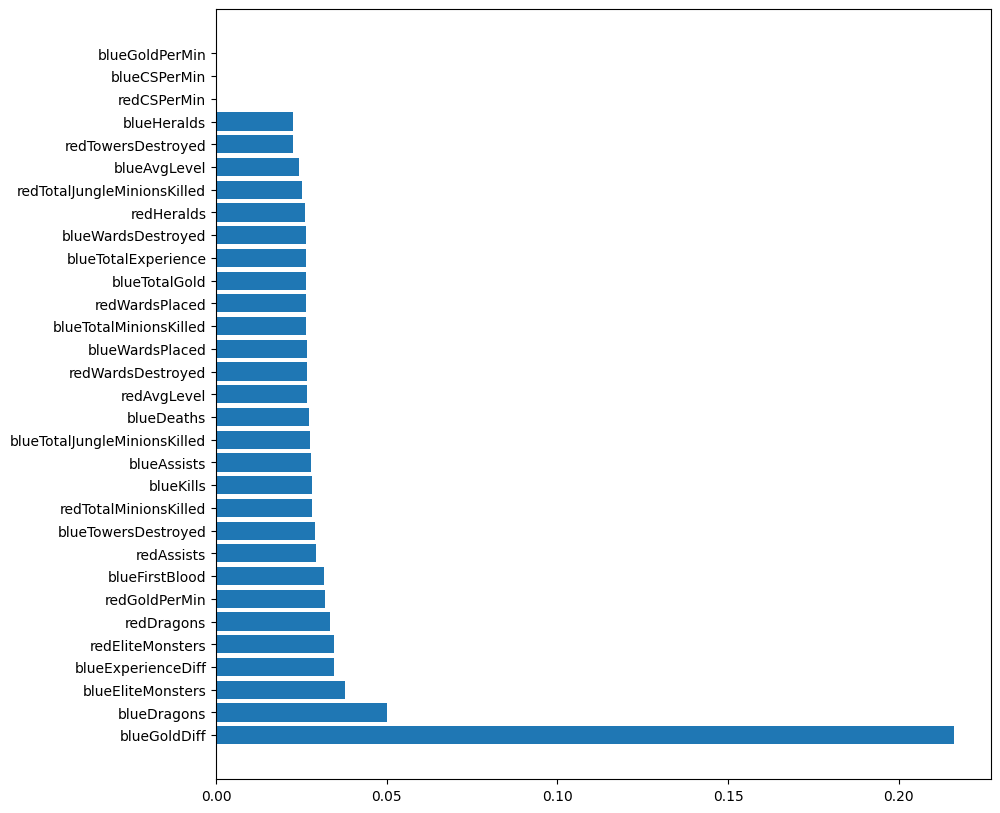

In [82]:
fig = plt.figure(figsize=(10, 10))
plt.barh(model_fi.index, model_fi["Model_Coefficient"])

In [84]:
model_fi.head().index

Index(['blueGoldDiff', 'blueDragons', 'blueEliteMonsters',
       'blueExperienceDiff', 'redEliteMonsters'],
      dtype='object')

In [88]:
X_train_xgb = X_train[
    [
        "blueGoldDiff",
        "blueDragons",
        "blueEliteMonsters",
        "blueExperienceDiff",
        "redEliteMonsters",
    ]
]
X_test_xgb = X_test[
    [
        "blueGoldDiff",
        "blueDragons",
        "blueEliteMonsters",
        "blueExperienceDiff",
        "redEliteMonsters",
    ]
]

In [99]:
model_xgb2 = XGBClassifier()
model_xgb2.fit(X_train_xgb, y_train)
test_pred_xgb2 = model_xgb2.predict(X_test_xgb)
print(classification_report(y_test, test_pred_xgb2))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71      1469
           1       0.72      0.71      0.72      1495

    accuracy                           0.72      2964
   macro avg       0.72      0.72      0.72      2964
weighted avg       0.72      0.72      0.72      2964



In [100]:
r2_score(y_test, test_pred_xgb), r2_score(y_test, test_pred_xgb2)

(-0.13234084115192246, -0.13773936721224156)